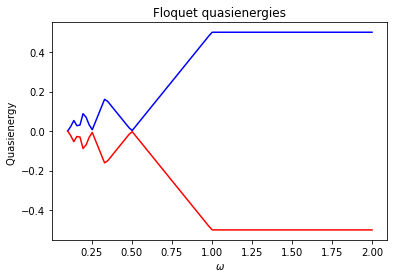

In [97]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt 
delta = 1 * 2*np.pi
eps0  = 0. * 2*np.pi
omega = np.linspace(0.1, 2, 100) * 2*np.pi
A_vec = 0.001*2*np.pi
T = (2*np.pi)/omega
tlist = np.linspace(0.0, T, 101)
spsi0 = basis(2,0)
q_energies = np.zeros((len(omega), 2))
H0 = delta/2.0 * sigmaz() - eps0/2.0 * sigmax()
args = {'w': omega}
for idx, om in enumerate(omega): 
    H1 = A_vec * sigmax() 
    H = [H0, [H1, lambda t, args: np.cos(om*t)]] 
    f_modes, f_energies = floquet_modes(H, T[idx], args, True) 
    q_energies[idx,:] = f_energies 
plt.figure() 
plt.plot(omega/2/np.pi, q_energies[:,0]/2/np.pi, 'b',omega/2/np.pi, q_energies[:,1]/2/np.pi , 'r') 
# plt.plot(A_vec/omega, 0.5*np.ones(100)-A_vec/omega/4) 
plt.xlabel(r'$\omega$') 
plt.ylabel(r'Quasienergy ') 
plt.title(r'Floquet quasienergies') 
plt.show() 

In [149]:
delta = 6 * 2*np.pi
eps0  = 0.0 * 2*np.pi
omega = 6.0 * 2*np.pi
A_vec = np.linspace(0., 0.4, 200) *2*np.pi
T = (2*np.pi)/omega
tlist = np.linspace(0.0, 10 * T, 101)
spsi0 = basis(2,0)
q_energies = np.zeros((len(A_vec), 2))
H0 = delta*basis(2,1)*basis(2,1).dag()
args = {'w': omega}
for idx, A in enumerate(A_vec): 
    H1 = A * sigmax() 
    H = [H0, [H1, lambda t, args: np.cos(args['w']*t)]] 
    f_modes, f_energies = floquet_modes(H, T, args, True) 
    q_energies[idx,:] = f_energies 


In [150]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming A_vec and q_energies are defined elsewhere in your code

# Create arrays for adjusted energies
adjusted_q_energies_0 = np.zeros_like(q_energies[:, 0])
adjusted_q_energies_1 = np.zeros_like(q_energies[:, 1])

# Track the previous value to determine increasing or decreasing trend
prev_energy_0 = q_energies[0, 0]
prev_energy_1 = q_energies[0, 1]

for i in range(len(q_energies)):
    current_energy_0 = q_energies[i, 0]
    current_energy_1 = q_energies[i, 1]

    # Check if q_energies[:,0] starts decreasing
    if current_energy_0 < prev_energy_0:
        adjusted_q_energies_0[i] = current_energy_0 / 2 / np.pi - 1
    else:
        adjusted_q_energies_0[i] = current_energy_0 / 2 / np.pi

    # Check if q_energies[:,1] starts increasing
    if current_energy_1 > prev_energy_1:
        adjusted_q_energies_1[i] = current_energy_1 / 2 / np.pi + 1
    else:
        adjusted_q_energies_1[i] = current_energy_1 / 2 / np.pi

    # Update previous values
    prev_energy_0 = current_energy_0
    prev_energy_1 = current_energy_1




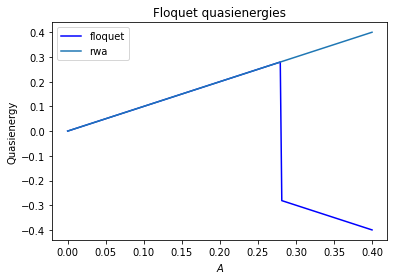

In [151]:
a=adjusted_q_energies_0[140:]
b=adjusted_q_energies_1[140:]
adjusted_q_energies_1[140:]=a
adjusted_q_energies_0[140:]=b
# Plotting the adjusted energies
plt.plot(A_vec / 2 / np.pi, -2*adjusted_q_energies_1, 'b',label='floquet')
# Original plot line
plt.plot(A_vec / 2 / np.pi, (A_vec / 2 / np.pi ),label='rwa')
# plt.plot(A_vec / 2 / np.pi, (A_vec / 2 / np.pi -(A_vec / 2 / np.pi )**2/32))
plt.xlabel(r'$A$')
plt.ylabel(r'Quasienergy')
plt.title(r'Floquet quasienergies')
plt.legend()
plt.show()

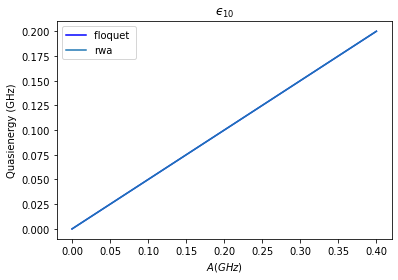

In [153]:
plt.figure() 
plt.plot(A_vec/2/np.pi, q_energies[:,0]/2/np.pi, 'b',label = 'floquet ') 
plt.plot(A_vec/2/np.pi, ((A_vec/2/np.pi/2)),label = 'rwa')
# plt.plot(A_vec/2/np.pi, ((A_vec/2/np.pi/2)-((A_vec)**2/omega)/4/2/np.pi/2),label = 'rwa and bs')

plt.xlabel(r'$A (GHz)$') 
plt.ylabel(r'Quasienergy (GHz)') 
plt.title(r'$ϵ_{10}$') 
plt.legend()
plt.show() 